# Import Libraries

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style ='whitegrid')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import warnings,datetime,calendar
warnings.filterwarnings('ignore')

# Reading Data

In [2]:
df = pd.read_csv('OnlineRetail.csv', sep = ',', encoding = 'latin1', error_bad_lines=False)
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [3]:
df.shape

(541909, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Data Cleaning

In [6]:
df[df['Quantity']<=0].shape

(10624, 8)

In [7]:
df[df['UnitPrice']<=0].shape

(2517, 8)

In [8]:
Wrongindices = []

Wrongindices = list(df[df['Quantity']<=0].index)
Wrongindices.extend(df[df['UnitPrice']<=0].index)
len(Wrongindices), len(set(Wrongindices))

(13141, 11805)

In [9]:
Wrongindices = list(set(Wrongindices))

In [10]:
df.drop(Wrongindices,axis=0,inplace=True)
df.reset_index(inplace=True)
df.drop(['index'],axis = 1,inplace=True)
df.shape

(530104, 8)

In [11]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,397884.000000
mean,10.542037,3.907625,15294.423453
std,155.524124,35.915681,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


# Nulls

In [12]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
dtype: int64

In [13]:
df['CustomerID'].fillna('No ID',inplace=True)
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [14]:
df['Member'] = df['CustomerID'].apply(lambda x : 0 if x =='No ID' else 1)
df['Member'].value_counts()

1    397884
0    132220
Name: Member, dtype: int64

In [15]:
df.duplicated().sum()

5226

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.reset_index(inplace=True)
df.drop(['index'],axis = 1,inplace=True)
df.shape

(524878, 9)

In [18]:
df.shape

(524878, 9)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524878 entries, 0 to 524877
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    524878 non-null  object 
 1   StockCode    524878 non-null  object 
 2   Description  524878 non-null  object 
 3   Quantity     524878 non-null  int64  
 4   InvoiceDate  524878 non-null  object 
 5   UnitPrice    524878 non-null  float64
 6   CustomerID   524878 non-null  object 
 7   Country      524878 non-null  object 
 8   Member       524878 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 36.0+ MB


In [20]:
df.describe()

,Quantity,UnitPrice,Member
count,524878.000000,524878.000000,524878.000000
mean,10.616600,3.922573,0.748159
std,156.280031,36.093028,0.434071
min,1.000000,0.001000,0.000000
25%,1.000000,1.250000,0.000000
50%,4.000000,2.080000,1.000000
75%,11.000000,4.130000,1.000000
max,80995.000000,13541.330000,1.000000


# Data Processing

In [21]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Member
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,1
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,1


In [22]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M', errors='coerce')

In [23]:
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Month_Name'] = df['InvoiceDate'].dt.month_name()
df['Week'] = df['InvoiceDate'].dt.week
df['Day'] = df['InvoiceDate'].dt.day
df['Week_Day'] = df['InvoiceDate'].dt.weekday
df['Day_Name'] = df['InvoiceDate'].dt.day_name()
df['Hour'] = df['InvoiceDate'].dt.hour
df['Minute'] = df['InvoiceDate'].dt.minute
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Member,Year,Month,Month_Name,Week,Day,Week_Day,Day_Name,Hour,Minute
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,2010,12,December,48,1,2,Wednesday,8,26
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,December,48,1,2,Wednesday,8,26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,2010,12,December,48,1,2,Wednesday,8,26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,December,48,1,2,Wednesday,8,26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,December,48,1,2,Wednesday,8,26


In [24]:
df['Year'].value_counts()

2011    483887
2010     40991
Name: Year, dtype: int64

In [25]:
def map_hours(x):
    if x in range(0, 13):
        return 'morning'
    elif x in range(13, 19):
        return 'afternoon'
    else:
        return 'evening' 

df['Period'] = df['Hour'].apply(map_hours)

In [26]:
def map_months(x):
    if x in [12, 1, 2]:
        return 'Winter'
    elif x in [3, 4, 5]:
        return 'Spring'
    elif x in [6, 7, 8]:
        return 'Summer'
    elif x in [9, 10, 11]:
        return 'Autumn'

df['Season'] = df['Month'].apply(map_months)

In [27]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Member,Year,Month,Month_Name,Week,Day,Week_Day,Day_Name,Hour,Minute,Period,Season
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,2010,12,December,48,1,2,Wednesday,8,26,morning,Winter
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,December,48,1,2,Wednesday,8,26,morning,Winter
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,2010,12,December,48,1,2,Wednesday,8,26,morning,Winter
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,December,48,1,2,Wednesday,8,26,morning,Winter
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,December,48,1,2,Wednesday,8,26,morning,Winter


In [28]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [29]:
df['Country'].replace('Israel','Palestine',inplace=True)




ContinentsDict = {'Europe':['United Kingdom','France','Netherlands','Germany','Norway'
                            ,'EIRE','Switzerland','Spain', 'Poland', 'Portugal','Italy'
                            ,'Belgium','Lithuania','Iceland','Channel Islands','Denmark'
                            ,'Cyprus','Sweden','Finland','Austria','Greece','Czech Republic'
                            ,'European Community','Malta'],
              'Asia':['Japan','Bahrain','Palestine','Hong Kong','Singapore','Lebanon',
                      'United Arab Emirates','Saudi Arabia'],
              'Americans':['Canada',  'Brazil', 'USA'],
              'Other':['Australia','Unspecified','RSA']}

In [30]:
ContinentsDict.keys()

dict_keys(['Europe', 'Asia', 'Americans', 'Other'])

In [31]:
def GetContinent(Country) : 
    global ContinentsDict
    for Key in ContinentsDict.keys() : 
        if Country in ContinentsDict[Key] : 
            return Key
    
df['Continent'] = df['Country'].apply(lambda x: GetContinent(x))

In [32]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="catuserbot")
def GeoLocate(country):
    try:
        loc = geolocator.geocode(country)
        return (loc.latitude, loc.longitude)
    except:
        return np.nan

In [33]:
#! pip install countryinfo

In [34]:
from countryinfo import CountryInfo

In [35]:
CapitalsDict = {}

for Country in df['Country'].unique() : 
    try : 
        CapitalsDict[Country] = CountryInfo(Country).capital()
    except :
        print(Country)
CapitalsDict    

EIRE
Channel Islands
Palestine
Unspecified
European Community


{'United Kingdom': 'London',
 'France': 'Paris',
 'Australia': 'Canberra',
 'Netherlands': 'Amsterdam',
 'Germany': 'Berlin',
 'Norway': 'Oslo',
 'Switzerland': 'Bern',
 'Spain': 'Madrid',
 'Poland': 'Warsaw',
 'Portugal': 'Lisbon',
 'Italy': 'Rome',
 'Belgium': 'Brussels',
 'Lithuania': 'Vilnius',
 'Japan': 'Tokyo',
 'Iceland': 'Reykjavik',
 'Denmark': 'Copenhagen',
 'Cyprus': 'Nicosia',
 'Sweden': 'Stockholm',
 'Finland': 'Helsinki',
 'Austria': 'Vienna',
 'Bahrain': 'Manama',
 'Greece': 'Athens',
 'Hong Kong': 'City of Victoria',
 'Singapore': 'Singapore',
 'Lebanon': 'Beirut',
 'United Arab Emirates': 'Abu Dhabi',
 'Saudi Arabia': 'Riyadh',
 'Czech Republic': 'Prague',
 'Canada': 'Ottawa',
 'Brazil': 'Brasília',
 'USA': 'Washington D.C.',
 'Malta': 'Valletta',
 'RSA': 'Pretoria'}

In [36]:
CapitalsDict['EIRE'] = 'Dublin'
CapitalsDict['Channel Islands'] = 'Peter Port'
CapitalsDict['Palestine'] = 'Quds'

In [37]:
LocationDict = {}
for Country in CapitalsDict.keys() : 
    a,b = GeoLocate(CapitalsDict[Country])
    LocationDict[Country] = [a,b]

In [38]:
[i for i in df['Country'].unique() if not i in LocationDict.keys()]

['Unspecified', 'European Community']

In [39]:
LocationDict['Unspecified'] = [0,0]
LocationDict['European Community'] = [51.5073219, -0.1276474]

In [40]:
df['Latt'] = df['Country'].apply(lambda x : LocationDict[x][0])
df['Long'] = df['Country'].apply(lambda x : LocationDict[x][1])

In [41]:
df['TotalPrice'] = df.apply(lambda x : x['Quantity'] * x['UnitPrice'],axis=1)

In [42]:
def QuantityLevel(x) : 
    x = int(x)
    if x < 10 : 
        return 'Low'
    elif  x < 100 : 
        return 'Medium'
    else :
        return 'Huge'
df['Quantity Level'] =df['Quantity'] .apply(lambda x : QuantityLevel(x))
df['Quantity Level'].value_counts()

Low       370741
Medium    147485
Huge        6652
Name: Quantity Level, dtype: int64

In [43]:
def UnitPriceLevel(x) : 
    x = int(x)
    if x < 1 : 
        return 'Cheap'
    elif  x <10 : 
        return 'Medium'
    else :
        return 'Expensive'
df['UnitPrice Level'] =df['UnitPrice'] .apply(lambda x : UnitPriceLevel(x))
df['UnitPrice Level'].value_counts()

Medium       391399
Cheap        109584
Expensive     23895
Name: UnitPrice Level, dtype: int64

In [44]:
def TotalPriceLevel(x) : 
    x = int(x)
    if x < 5 : 
        return 'Cheap'
    elif 5<= x <20 : 
        return 'Medium'
    else :
        return 'Expensive'
df['TotalPriceLevel'] =df['TotalPrice'] .apply(lambda x : TotalPriceLevel(x))

In [45]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Member,Year,Month,Month_Name,Week,Day,Week_Day,Day_Name,Hour,Minute,Period,Season,Continent,Latt,Long,TotalPrice,Quantity Level,UnitPrice Level,TotalPriceLevel
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,2010,12,December,48,1,2,Wednesday,8,26,morning,Winter,Europe,51.507322,-0.127647,15.30,Low,Medium,Medium
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,December,48,1,2,Wednesday,8,26,morning,Winter,Europe,51.507322,-0.127647,20.34,Low,Medium,Expensive
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,2010,12,December,48,1,2,Wednesday,8,26,morning,Winter,Europe,51.507322,-0.127647,22.00,Low,Medium,Expensive
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,December,48,1,2,Wednesday,8,26,morning,Winter,Europe,51.507322,-0.127647,20.34,Low,Medium,Expensive
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,December,48,1,2,Wednesday,8,26,morning,Winter,Europe,51.507322,-0.127647,20.34,Low,Medium,Expensive


In [46]:
df['Desc Char Length'] = df['Description'].apply(
    lambda x :  len(x))
df['Desc Word Length'] = df['Description'].apply(
    lambda x :  len(x.split()))

In [47]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Member,Year,Month,Month_Name,Week,Day,Week_Day,Day_Name,Hour,Minute,Period,Season,Continent,Latt,Long,TotalPrice,Quantity Level,UnitPrice Level,TotalPriceLevel,Desc Char Length,Desc Word Length
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,2010,12,December,48,1,2,Wednesday,8,26,morning,Winter,Europe,51.507322,-0.127647,15.30,Low,Medium,Medium,34,5
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,December,48,1,2,Wednesday,8,26,morning,Winter,Europe,51.507322,-0.127647,20.34,Low,Medium,Expensive,19,3
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,2010,12,December,48,1,2,Wednesday,8,26,morning,Winter,Europe,51.507322,-0.127647,22.00,Low,Medium,Expensive,30,5
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,December,48,1,2,Wednesday,8,26,morning,Winter,Europe,51.507322,-0.127647,20.34,Low,Medium,Expensive,35,6
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,December,48,1,2,Wednesday,8,26,morning,Winter,Europe,51.507322,-0.127647,20.34,Low,Medium,Expensive,30,5


In [48]:
AllDescription = ' '.join(df['Description'].tolist())
AllDescription = ' '.join([(i).lower() 
for i in AllDescription.split()])
len(AllDescription)

14392144

In [49]:
len(AllDescription.split())

2303213

In [50]:
MostRepeatedWords = {}

for Word in AllDescription.split() : 
    if Word in MostRepeatedWords.keys() : 
        MostRepeatedWords[Word] +=1
    else : 
        MostRepeatedWords[Word] =1
MostRepeatedWords

{'white': 20198,
 'hanging': 16452,
 'heart': 37841,
 't-light': 14063,
 'holder': 15710,
 'metal': 20396,
 'lantern': 2270,
 'cream': 7760,
 'cupid': 333,
 'hearts': 4910,
 'coat': 1570,
 'hanger': 2145,
 'knitted': 786,
 'union': 5344,
 'flag': 1745,
 'hot': 10293,
 'water': 9771,
 'bottle': 11463,
 'red': 41742,
 'woolly': 438,
 'hottie': 438,
 'heart.': 438,
 'set': 53069,
 '7': 623,
 'babushka': 3155,
 'nesting': 498,
 'boxes': 3145,
 'glass': 11527,
 'star': 5948,
 'frosted': 154,
 'hand': 4796,
 'warmer': 4479,
 'jack': 3723,
 'polka': 194,
 'dot': 107,
 'assorted': 7359,
 'colour': 6040,
 'bird': 5743,
 'ornament': 1476,
 "poppy's": 1422,
 'playhouse': 1422,
 'bedroom': 425,
 'kitchen': 3455,
 'feltcraft': 7041,
 'princess': 1164,
 'charlotte': 6213,
 'doll': 2183,
 'ivory': 7943,
 'mug': 7917,
 'cosy': 1276,
 'box': 23554,
 'of': 52015,
 '6': 12865,
 'teaspoons': 210,
 'vintage': 32964,
 'jigsaw': 1623,
 'blocks': 502,
 'alphabet': 3830,
 'home': 9275,
 'building': 1686,
 'blo

In [51]:
len(MostRepeatedWords.keys())

2351

In [52]:
MostRepeatedWords=  {k:v for k,v in sorted(
    MostRepeatedWords.items(),key = lambda
    item: item[1],reverse = True) }
MostRepeatedWords

{'set': 53069,
 'of': 52015,
 'bag': 50823,
 'red': 41742,
 'heart': 37841,
 'retrospot': 34124,
 'vintage': 32964,
 'design': 29200,
 'pink': 28869,
 'christmas': 24587,
 'box': 23554,
 'jumbo': 20724,
 'cake': 20681,
 'metal': 20396,
 'white': 20198,
 'blue': 18804,
 'lunch': 18007,
 '3': 17893,
 'sign': 16677,
 'hanging': 16452,
 'holder': 15710,
 'pack': 15319,
 'paper': 14135,
 't-light': 14063,
 'small': 13945,
 'card': 13058,
 '6': 12865,
 'decoration': 12716,
 'wooden': 12435,
 'polkadot': 12228,
 'cases': 11721,
 'glass': 11527,
 'tea': 11519,
 'bottle': 11463,
 '12': 11191,
 'in': 10959,
 'and': 10606,
 'spaceboy': 10570,
 'hot': 10293,
 'water': 9771,
 'with': 9519,
 'large': 9428,
 'pantry': 9403,
 'home': 9275,
 'tin': 9191,
 'rose': 9163,
 'paisley': 9149,
 '4': 8925,
 'green': 8865,
 'ceramic': 8757,
 'regency': 8613,
 'doormat': 8255,
 'dolly': 8221,
 'mini': 7970,
 'ivory': 7943,
 'mug': 7917,
 'bunting': 7881,
 'love': 7793,
 'cream': 7760,
 'girl': 7601,
 'party': 74

In [53]:
ImportantWords = ['bag','red','heart','retrospot',
                  'vintage','design','pink','christmas',
                  'box','kitchen'] 

In [54]:
for Word in ImportantWords : 
    df[f'Repeated Word : {Word}'] = df['Description'].apply(lambda x : 1 if Word in x.lower() else 0)

In [55]:
df['CustomerID'].replace('No ID',0,inplace=True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524878 entries, 0 to 524877
Data columns (total 39 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   InvoiceNo                  524878 non-null  object        
 1   StockCode                  524878 non-null  object        
 2   Description                524878 non-null  object        
 3   Quantity                   524878 non-null  int64         
 4   InvoiceDate                524878 non-null  datetime64[ns]
 5   UnitPrice                  524878 non-null  float64       
 6   CustomerID                 524878 non-null  float64       
 7   Country                    524878 non-null  object        
 8   Member                     524878 non-null  int64         
 9   Year                       524878 non-null  int64         
 10  Month                      524878 non-null  int64         
 11  Month_Name                 524878 non-null  object  

# Data Visualization

In [57]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Member,Year,Month,Month_Name,Week,Day,Week_Day,Day_Name,Hour,Minute,Period,Season,Continent,Latt,Long,TotalPrice,Quantity Level,UnitPrice Level,TotalPriceLevel,Desc Char Length,Desc Word Length,Repeated Word : bag,Repeated Word : red,Repeated Word : heart,Repeated Word : retrospot,Repeated Word : vintage,Repeated Word : design,Repeated Word : pink,Repeated Word : christmas,Repeated Word : box,Repeated Word : kitchen
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,2010,12,December,48,1,2,Wednesday,8,26,morning,Winter,Europe,51.507322,-0.127647,15.30,Low,Medium,Medium,34,5,0,0,1,0,0,0,0,0,0,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,December,48,1,2,Wednesday,8,26,morning,Winter,Europe,51.507322,-0.127647,20.34,Low,Medium,Expensive,19,3,0,0,0,0,0,0,0,0,0,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,2010,12,December,48,1,2,Wednesday,8,26,morning,Winter,Europe,51.507322,-0.127647,22.00,Low,Medium,Expensive,30,5,0,0,1,0,0,0,0,0,0,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,December,48,1,2,Wednesday,8,26,morning,Winter,Europe,51.507322,-0.127647,20.34,Low,Medium,Expensive,35,6,0,0,0,0,0,0,0,0,0,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,December,48,1,2,Wednesday,8,26,morning,Winter,Europe,51.507322,-0.127647,20.34,Low,Medium,Expensive,30,5,0,1,1,0,0,0,0,0,0,0


<AxesSubplot:xlabel='Quantity', ylabel='Density'>

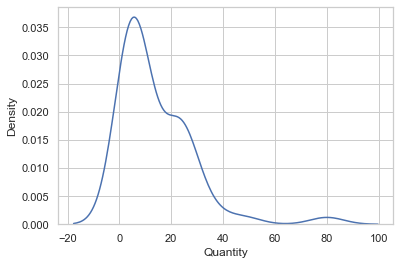

In [58]:
sns.kdeplot(data=df.head(50) , x='Quantity')

<AxesSubplot:xlabel='UnitPrice', ylabel='Density'>

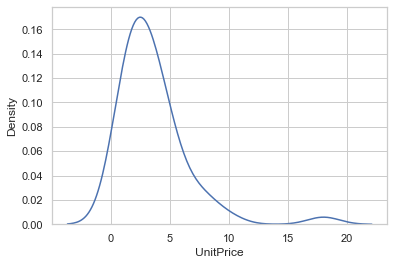

In [59]:
sns.kdeplot(data=df.head(50) , x='UnitPrice')

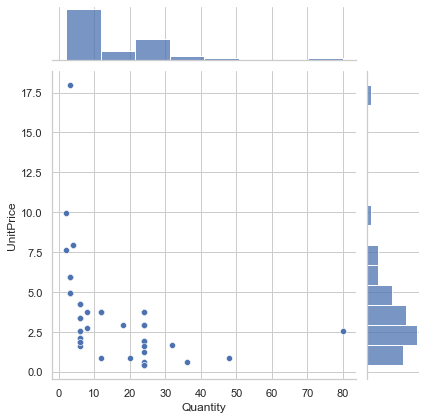

In [60]:
sns.jointplot(x='Quantity',y='UnitPrice',data=df.head(50))

In [61]:
def Pie(data,feature,Limit=20) : 
    fig, ax = plt.subplots(figsize=(10,6))
    plt.pie(data[feature].value_counts()[:Limit],labels=list(
        data[feature].value_counts()[:Limit].index),
        autopct ='%1.2f%%' , labeldistance = 1.1,
            explode = [0.05 for i in range(len(data[feature].value_counts()[:Limit]))] )
    plt.show()  

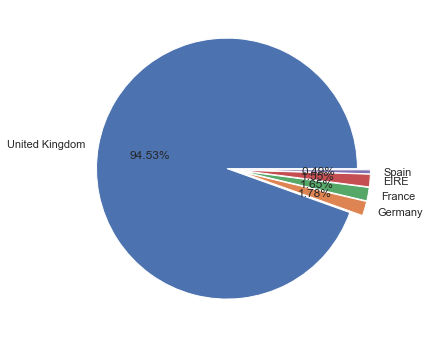

In [62]:
Pie(df,'Country',5)

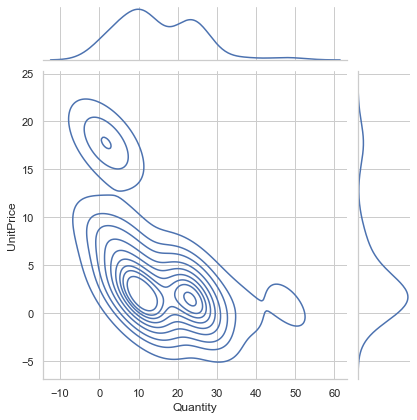

In [63]:
sns.jointplot(x='Quantity',y='UnitPrice',data=df[df['Country']=='France'].head(50),kind='kde')

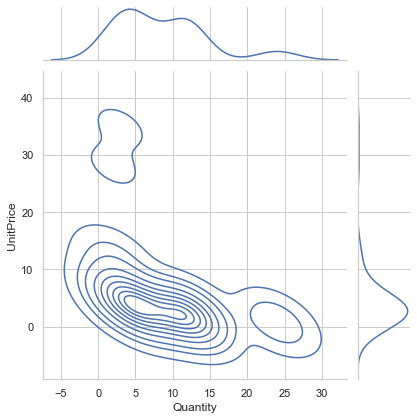

In [64]:
sns.jointplot(x='Quantity',y='UnitPrice',data=df[df['Country']=='Italy'].head(50),kind='kde')

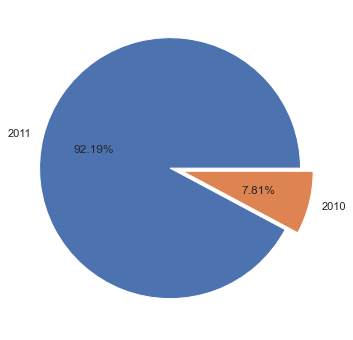

In [65]:
Pie(df,'Year')

In [66]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Member,Year,Month,Month_Name,Week,Day,Week_Day,Day_Name,Hour,Minute,Period,Season,Continent,Latt,Long,TotalPrice,Quantity Level,UnitPrice Level,TotalPriceLevel,Desc Char Length,Desc Word Length,Repeated Word : bag,Repeated Word : red,Repeated Word : heart,Repeated Word : retrospot,Repeated Word : vintage,Repeated Word : design,Repeated Word : pink,Repeated Word : christmas,Repeated Word : box,Repeated Word : kitchen
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,2010,12,December,48,1,2,Wednesday,8,26,morning,Winter,Europe,51.507322,-0.127647,15.30,Low,Medium,Medium,34,5,0,0,1,0,0,0,0,0,0,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,December,48,1,2,Wednesday,8,26,morning,Winter,Europe,51.507322,-0.127647,20.34,Low,Medium,Expensive,19,3,0,0,0,0,0,0,0,0,0,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,2010,12,December,48,1,2,Wednesday,8,26,morning,Winter,Europe,51.507322,-0.127647,22.00,Low,Medium,Expensive,30,5,0,0,1,0,0,0,0,0,0,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,December,48,1,2,Wednesday,8,26,morning,Winter,Europe,51.507322,-0.127647,20.34,Low,Medium,Expensive,35,6,0,0,0,0,0,0,0,0,0,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,December,48,1,2,Wednesday,8,26,morning,Winter,Europe,51.507322,-0.127647,20.34,Low,Medium,Expensive,30,5,0,1,1,0,0,0,0,0,0,0


<AxesSubplot:xlabel='count', ylabel='Month_Name'>

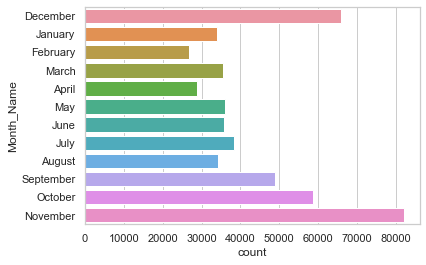

In [67]:
sns.countplot(data=df,y='Month_Name')

<AxesSubplot:xlabel='Month'>

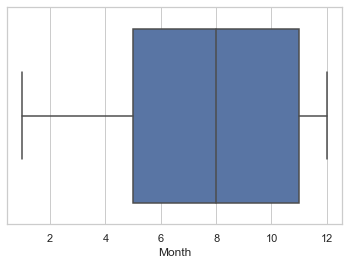

In [68]:
sns.boxplot(data=df,x='Month')

<AxesSubplot:xlabel='Day_Name', ylabel='Month'>

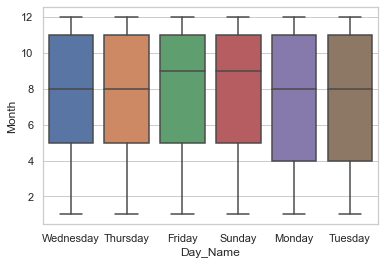

In [69]:
sns.boxplot(data=df,y='Month',x='Day_Name')

In [70]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Member,Year,Month,Month_Name,Week,Day,Week_Day,Day_Name,Hour,Minute,Period,Season,Continent,Latt,Long,TotalPrice,Quantity Level,UnitPrice Level,TotalPriceLevel,Desc Char Length,Desc Word Length,Repeated Word : bag,Repeated Word : red,Repeated Word : heart,Repeated Word : retrospot,Repeated Word : vintage,Repeated Word : design,Repeated Word : pink,Repeated Word : christmas,Repeated Word : box,Repeated Word : kitchen
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,2010,12,December,48,1,2,Wednesday,8,26,morning,Winter,Europe,51.507322,-0.127647,15.30,Low,Medium,Medium,34,5,0,0,1,0,0,0,0,0,0,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,December,48,1,2,Wednesday,8,26,morning,Winter,Europe,51.507322,-0.127647,20.34,Low,Medium,Expensive,19,3,0,0,0,0,0,0,0,0,0,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,2010,12,December,48,1,2,Wednesday,8,26,morning,Winter,Europe,51.507322,-0.127647,22.00,Low,Medium,Expensive,30,5,0,0,1,0,0,0,0,0,0,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,December,48,1,2,Wednesday,8,26,morning,Winter,Europe,51.507322,-0.127647,20.34,Low,Medium,Expensive,35,6,0,0,0,0,0,0,0,0,0,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,December,48,1,2,Wednesday,8,26,morning,Winter,Europe,51.507322,-0.127647,20.34,Low,Medium,Expensive,30,5,0,1,1,0,0,0,0,0,0,0


<AxesSubplot:xlabel='Day_Name', ylabel='Month'>

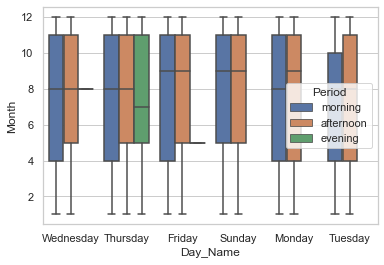

In [71]:
sns.boxplot(data=df,y='Month',x='Day_Name',hue='Period')

<AxesSubplot:xlabel='Day_Name', ylabel='Month'>

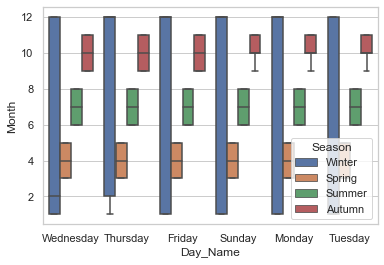

In [72]:
sns.boxplot(data=df,y='Month',x='Day_Name',hue='Season')

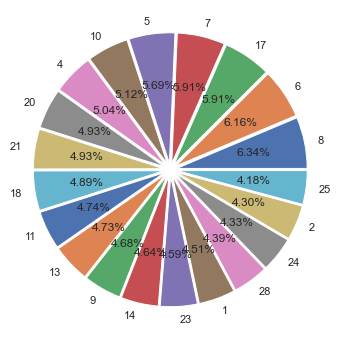

In [73]:
Pie(df,'Day')

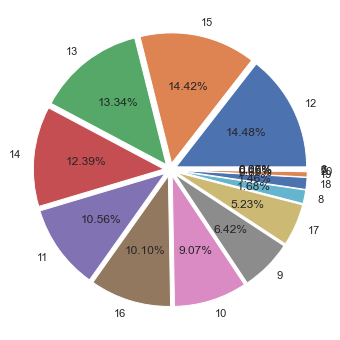

In [74]:
Pie(df,'Hour')

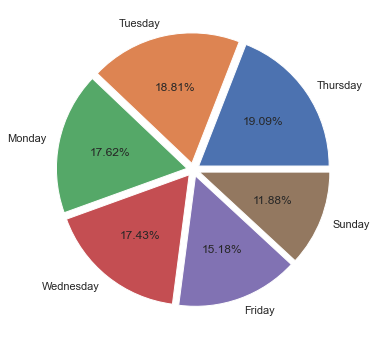

In [75]:
Pie(df,'Day_Name')

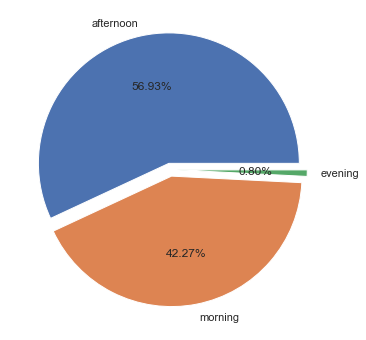

In [76]:
Pie(df,'Period')

<AxesSubplot:xlabel='Desc Char Length', ylabel='Density'>

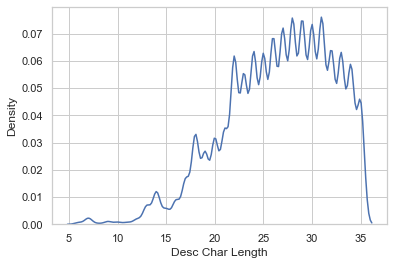

In [77]:
sns.kdeplot(data = df , x='Desc Char Length')

<AxesSubplot:xlabel='Desc Word Length', ylabel='Density'>

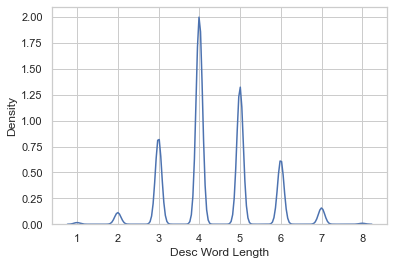

In [78]:
sns.kdeplot(data = df , x='Desc Word Length')

In [79]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Member', 'Year', 'Month',
       'Month_Name', 'Week', 'Day', 'Week_Day', 'Day_Name', 'Hour', 'Minute',
       'Period', 'Season', 'Continent', 'Latt', 'Long', 'TotalPrice',
       'Quantity Level', 'UnitPrice Level', 'TotalPriceLevel',
       'Desc Char Length', 'Desc Word Length', 'Repeated Word : bag',
       'Repeated Word : red', 'Repeated Word : heart',
       'Repeated Word : retrospot', 'Repeated Word : vintage',
       'Repeated Word : design', 'Repeated Word : pink',
       'Repeated Word : christmas', 'Repeated Word : box',
       'Repeated Word : kitchen'],
      dtype='object')

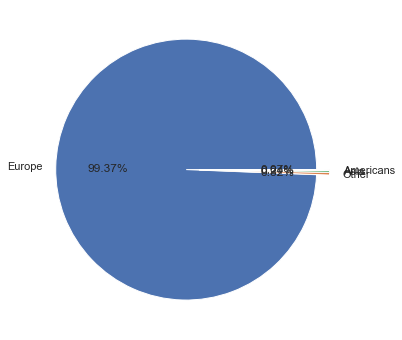

In [80]:
Pie(df,'Continent')

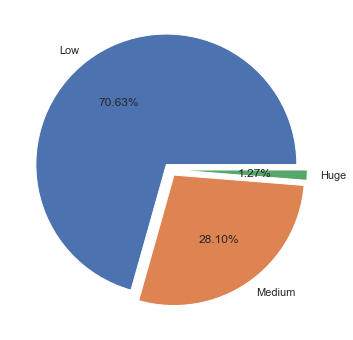

In [81]:
Pie(df,'Quantity Level')

<AxesSubplot:xlabel='UnitPrice Level', ylabel='count'>

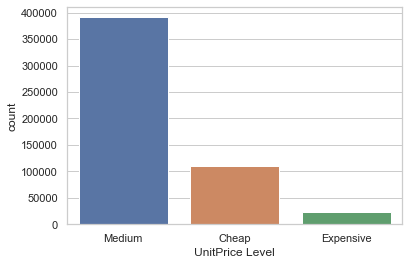

In [82]:
sns.countplot(data=df,x='UnitPrice Level')

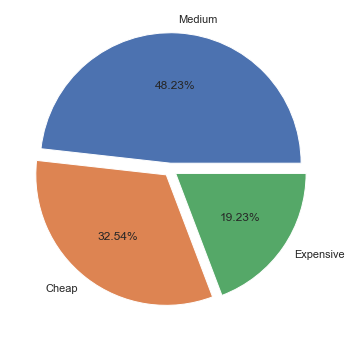

In [83]:
Pie(df,'TotalPriceLevel')

<AxesSubplot:xlabel='Season', ylabel='count'>

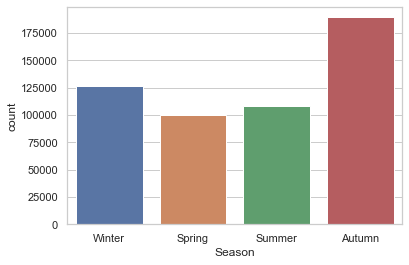

In [84]:
sns.countplot(data=df,x='Season')

In [85]:
def SelectedFeaturePie(data,feature,Limit=10) : 
    fig, ax = plt.subplots(figsize=(15,4))
    
    plt.subplot(1,4,1)
    plt.title('Summer')
    Data = data[data['Season']=='Summer']
    plt.pie(Data[feature].value_counts()[:Limit],labels=list(
        Data[feature].value_counts()[:Limit].index),
        autopct ='%1.2f%%' , labeldistance = 1.1,
            explode = [0.05 for i in range(len(Data[feature].value_counts()[:Limit]))] )

    plt.subplot(1,4,2)
    plt.title('Winter')
    Data = data[data['Season']=='Winter']
    plt.pie(Data[feature].value_counts()[:Limit],labels=list(Data[feature].value_counts()[:Limit].index),
        autopct ='%1.2f%%' , labeldistance = 1.1,explode = [0.05 for i in range(len(Data[feature].value_counts()[:Limit]))] )

    plt.subplot(1,4,3)
    plt.title('Spring')
    Data = data[data['Season']=='Spring']
    plt.pie(Data[feature].value_counts()[:Limit],labels=list(Data[feature].value_counts()[:Limit].index),
        autopct ='%1.2f%%' , labeldistance = 1.1,explode = [0.05 for i in range(len(Data[feature].value_counts()[:Limit]))] )

    plt.show()     

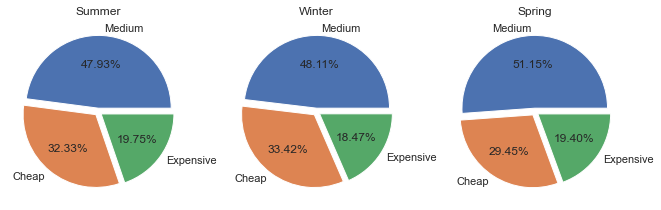

In [86]:
SelectedFeaturePie(df,'TotalPriceLevel')

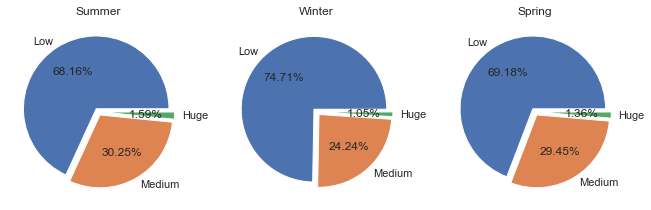

In [87]:
SelectedFeaturePie(df,'Quantity Level')

# Data Preparing


In [88]:
def ApplyEncoder(OriginalColumn) : 
    global data
    Encoder = LabelEncoder()
    Encoder.fit(df[OriginalColumn])
    return Encoder.transform(df[OriginalColumn])

In [89]:
EncodedFeatures = ['Country','Period','Season','Continent',
                   'Quantity Level','UnitPrice Level','TotalPriceLevel',
                    'Season']

In [90]:
for Col in EncodedFeatures : 
    df[f'Enc_{Col}'] = ApplyEncoder(Col)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Member,Year,Month,Month_Name,Week,Day,Week_Day,Day_Name,Hour,Minute,Period,Season,Continent,Latt,Long,TotalPrice,Quantity Level,UnitPrice Level,TotalPriceLevel,Desc Char Length,Desc Word Length,Repeated Word : bag,Repeated Word : red,Repeated Word : heart,Repeated Word : retrospot,Repeated Word : vintage,Repeated Word : design,Repeated Word : pink,Repeated Word : christmas,Repeated Word : box,Repeated Word : kitchen,Enc_Country,Enc_Period,Enc_Season,Enc_Continent,Enc_Quantity Level,Enc_UnitPrice Level,Enc_TotalPriceLevel
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,2010,12,December,48,1,2,Wednesday,8,26,morning,Winter,Europe,51.507322,-0.127647,15.30,Low,Medium,Medium,34,5,0,0,1,0,0,0,0,0,0,0,36,2,3,2,1,2,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,December,48,1,2,Wednesday,8,26,morning,Winter,Europe,51.507322,-0.127647,20.34,Low,Medium,Expensive,19,3,0,0,0,0,0,0,0,0,0,0,36,2,3,2,1,2,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,2010,12,December,48,1,2,Wednesday,8,26,morning,Winter,Europe,51.507322,-0.127647,22.00,Low,Medium,Expensive,30,5,0,0,1,0,0,0,0,0,0,0,36,2,3,2,1,2,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,December,48,1,2,Wednesday,8,26,morning,Winter,Europe,51.507322,-0.127647,20.34,Low,Medium,Expensive,35,6,0,0,0,0,0,0,0,0,0,0,36,2,3,2,1,2,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,December,48,1,2,Wednesday,8,26,morning,Winter,Europe,51.507322,-0.127647,20.34,Low,Medium,Expensive,30,5,0,1,1,0,0,0,0,0,0,0,36,2,3,2,1,2,1


In [91]:
df['Month_Name'].unique()

array(['December', 'January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November'], dtype=object)

In [92]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Member,Year,Month,Month_Name,Week,Day,Week_Day,Day_Name,Hour,Minute,Period,Season,Continent,Latt,Long,TotalPrice,Quantity Level,UnitPrice Level,TotalPriceLevel,Desc Char Length,Desc Word Length,Repeated Word : bag,Repeated Word : red,Repeated Word : heart,Repeated Word : retrospot,Repeated Word : vintage,Repeated Word : design,Repeated Word : pink,Repeated Word : christmas,Repeated Word : box,Repeated Word : kitchen,Enc_Country,Enc_Period,Enc_Season,Enc_Continent,Enc_Quantity Level,Enc_UnitPrice Level,Enc_TotalPriceLevel
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,2010,12,December,48,1,2,Wednesday,8,26,morning,Winter,Europe,51.507322,-0.127647,15.30,Low,Medium,Medium,34,5,0,0,1,0,0,0,0,0,0,0,36,2,3,2,1,2,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,December,48,1,2,Wednesday,8,26,morning,Winter,Europe,51.507322,-0.127647,20.34,Low,Medium,Expensive,19,3,0,0,0,0,0,0,0,0,0,0,36,2,3,2,1,2,1


In [93]:
df['Week']

0         48
1         48
2         48
3         48
4         48
          ..
524873    49
524874    49
524875    49
524876    49
524877    49
Name: Week, Length: 524878, dtype: int64

In [94]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Member', 'Year', 'Month',
       'Month_Name', 'Week', 'Day', 'Week_Day', 'Day_Name', 'Hour', 'Minute',
       'Period', 'Season', 'Continent', 'Latt', 'Long', 'TotalPrice',
       'Quantity Level', 'UnitPrice Level', 'TotalPriceLevel',
       'Desc Char Length', 'Desc Word Length', 'Repeated Word : bag',
       'Repeated Word : red', 'Repeated Word : heart',
       'Repeated Word : retrospot', 'Repeated Word : vintage',
       'Repeated Word : design', 'Repeated Word : pink',
       'Repeated Word : christmas', 'Repeated Word : box',
       'Repeated Word : kitchen', 'Enc_Country', 'Enc_Period', 'Enc_Season',
       'Enc_Continent', 'Enc_Quantity Level', 'Enc_UnitPrice Level',
       'Enc_TotalPriceLevel'],
      dtype='object')

# Feature Selection

In [95]:
x = df[['Enc_Quantity Level','Enc_UnitPrice Level','Enc_TotalPriceLevel','Enc_Continent','Enc_Season','Enc_Period'
        ,'Enc_Country','Quantity','UnitPrice','CustomerID','Member','Year','Month','Week','Day', 'Week_Day',
        'Hour', 'Minute','Desc Char Length','Desc Word Length',
     'Repeated Word : bag','Repeated Word : red','Repeated Word : heart','Repeated Word : retrospot','Repeated Word : vintage',
     'Repeated Word : design','Repeated Word : pink','Repeated Word : christmas','Repeated Word : box','Repeated Word : kitchen'
]]

In [96]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524878 entries, 0 to 524877
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Enc_Quantity Level         524878 non-null  int32  
 1   Enc_UnitPrice Level        524878 non-null  int32  
 2   Enc_TotalPriceLevel        524878 non-null  int32  
 3   Enc_Continent              524878 non-null  int32  
 4   Enc_Season                 524878 non-null  int32  
 5   Enc_Period                 524878 non-null  int32  
 6   Enc_Country                524878 non-null  int32  
 7   Quantity                   524878 non-null  int64  
 8   UnitPrice                  524878 non-null  float64
 9   CustomerID                 524878 non-null  float64
 10  Member                     524878 non-null  int64  
 11  Year                       524878 non-null  int64  
 12  Month                      524878 non-null  int64  
 13  Week                       52

# Scaling

In [97]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_ = scaler.fit_transform(x)

In [98]:
x_ = pd.DataFrame(x_,columns = x.columns)
x_

,Enc_Quantity Level,Enc_UnitPrice Level,Enc_TotalPriceLevel,Enc_Continent,Enc_Season,Enc_Period,Enc_Country,Quantity,UnitPrice,CustomerID,Member,Year,Month,Week,Day,Week_Day,Hour,Minute,Desc Char Length,Desc Word Length,Repeated Word : bag,Repeated Word : red,Repeated Word : heart,Repeated Word : retrospot,Repeated Word : vintage,Repeated Word : design,Repeated Word : pink,Repeated Word : christmas,Repeated Word : box,Repeated Word : kitchen
0,-0.569893,0.567361,0.952762,0.006234,1.399916,1.163893,0.279842,-0.029541,-0.038029,0.943049,0.580185,-3.435799,1.267833,1.140689,-1.619087,-0.232495,-2.076957,-0.236468,1.359736,0.560907,-0.331358,-0.305208,3.171946,-0.263693,-0.258891,-0.245136,-0.244748,-0.221692,-0.234836,-0.081401
1,-0.569893,0.567361,-0.177264,0.006234,1.399916,1.163893,0.279842,-0.029541,-0.014756,0.943049,0.580185,-3.435799,1.267833,1.140689,-1.619087,-0.232495,-2.076957,-0.236468,-1.425217,-1.272399,-0.331358,-0.305208,-0.315264,-0.263693,-0.258891,-0.245136,-0.244748,-0.221692,-0.234836,-0.081401
2,-0.569893,0.567361,-0.177264,0.006234,1.399916,1.163893,0.279842,-0.016743,-0.032488,0.943049,0.580185,-3.435799,1.267833,1.140689,-1.619087,-0.232495,-2.076957,-0.236468,0.617082,0.560907,-0.331358,-0.305208,3.171946,-0.263693,-0.258891,-0.245136,-0.244748,-0.221692,-0.234836,-0.081401
3,-0.569893,0.567361,-0.177264,0.006234,1.399916,1.163893,0.279842,-0.029541,-0.014756,0.943049,0.580185,-3.435799,1.267833,1.140689,-1.619087,-0.232495,-2.076957,-0.236468,1.545400,1.477561,-0.331358,-0.305208,-0.315264,-0.263693,-0.258891,-0.245136,-0.244748,-0.221692,-0.234836,-0.081401
4,-0.569893,0.567361,-0.177264,0.006234,1.399916,1.163893,0.279842,-0.029541,-0.014756,0.943049,0.580185,-3.435799,1.267833,1.140689,-1.619087,-0.232495,-2.076957,-0.236468,0.617082,0.560907,-0.331358,3.276454,3.171946,-0.263693,-0.258891,-0.245136,-0.244748,-0.221692,-0.234836,-0.081401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524873,1.554072,-1.882992,0.952762,0.006234,1.399916,1.163893,-3.414792,0.008852,-0.085129,0.182700,0.580185,0.291053,1.267833,1.206722,-0.695377,0.851050,-0.439621,1.178661,0.060091,0.560907,-0.331358,-0.305208,-0.315264,-0.263693,-0.258891,-0.245136,-0.244748,-0.221692,-0.234836,-0.081401
524874,-0.569893,0.567361,0.952762,0.006234,1.399916,1.163893,-3.414792,-0.029541,-0.050497,0.182700,0.580185,0.291053,1.267833,1.206722,-0.695377,0.851050,-0.439621,1.178661,0.245755,-0.355746,-0.331358,-0.305208,-0.315264,-0.263693,-0.258891,-0.245136,-0.244748,-0.221692,-0.234836,-0.081401
524875,-0.569893,0.567361,0.952762,0.006234,1.399916,1.163893,-3.414792,-0.042338,0.006301,0.182700,0.580185,0.291053,1.267833,1.206722,-0.695377,0.851050,-0.439621,1.178661,0.431418,-0.355746,-0.331358,-0.305208,-0.315264,-0.263693,-0.258891,-0.245136,-0.244748,-0.221692,-0.234836,-0.081401
524876,-0.569893,0.567361,0.952762,0.006234,1.399916,1.163893,-3.414792,-0.042338,0.006301,0.182700,0.580185,0.291053,1.267833,1.206722,-0.695377,0.851050,-0.439621,1.178661,0.802745,-0.355746,-0.331358,-0.305208,-0.315264,-0.263693,-0.258891,-0.245136,-0.244748,-0.221692,-0.234836,-0.081401


# Kmeans Model

In [99]:
from sklearn.cluster import KMeans

In [100]:
KMeansModel = KMeans(n_clusters=3,max_iter=1000,verbose=2,random_state=33)
KMeansModel.fit(x_)
print('KMeansModel intertia is : ' , KMeansModel.inertia_)
print('KMeansModel No. of iteration is : ' , KMeansModel.n_iter_)

Initialization complete
Iteration 0, inertia 19132374.260245863
Iteration 1, inertia 14632199.530520568
Iteration 2, inertia 14298601.503215086
Iteration 3, inertia 13988956.949239315
Iteration 4, inertia 13909109.970128376
Iteration 5, inertia 13880409.539502362
Iteration 6, inertia 13872509.00058823
Iteration 7, inertia 13871045.55065568
Iteration 8, inertia 13870805.492703158
Iteration 9, inertia 13870739.532223051
Converged at iteration 9: center shift 7.004038856509067e-05 within tolerance 9.999999999998096e-05.
Initialization complete
Iteration 0, inertia 21454170.40979536
Iteration 1, inertia 14702208.553117575
Iteration 2, inertia 14553505.049766827
Iteration 3, inertia 14438470.990519706
Iteration 4, inertia 14328987.50260004
Iteration 5, inertia 14218904.161396865
Iteration 6, inertia 14095734.435136113
Iteration 7, inertia 13939565.101504944
Iteration 8, inertia 13884455.662576413
Iteration 9, inertia 13872942.735869078
Iteration 10, inertia 13871086.693405226
Iteration 11, 

In [101]:
import random 

In [102]:
InertiaDict = {}
M = 0
for j in range(2,8) :
    for i in range(10) : 
        M+=1
        Columns = random.sample(set(x_.columns),j)
        print(Columns)
        
        KMeansModel = KMeans(n_clusters=3,max_iter=1000,verbose=0,random_state=33)
        KMeansModel.fit(x_[Columns])
        InertiaValue = KMeansModel.inertia_/1000000
        InertiaDict[M] = [InertiaValue,Columns]
        print(f'for Columns {Columns} intertia is : {InertiaValue}')   

['Repeated Word : red', 'Repeated Word : pink']
for Columns ['Repeated Word : red', 'Repeated Word : pink'] intertia is : 0.00025639303334885015
['Enc_Continent', 'Desc Char Length']
for Columns ['Enc_Continent', 'Desc Char Length'] intertia is : 0.40405608808332133
['Enc_TotalPriceLevel', 'Repeated Word : box']
for Columns ['Enc_TotalPriceLevel', 'Repeated Word : box'] intertia is : 0.10412788955290521
['Hour', 'Repeated Word : pink']
for Columns ['Hour', 'Repeated Word : pink'] intertia is : 0.18008749560551646
['Enc_Country', 'Month']
for Columns ['Enc_Country', 'Month'] intertia is : 0.17743455519791618
['Hour', 'Enc_Continent']
for Columns ['Hour', 'Enc_Continent'] intertia is : 0.39363323683965945
['Repeated Word : box', 'Repeated Word : heart']
for Columns ['Repeated Word : box', 'Repeated Word : heart'] intertia is : 0.010505947484579399
['Desc Char Length', 'Enc_Period']
for Columns ['Desc Char Length', 'Enc_Period'] intertia is : 0.31866618125203766
['Year', 'Week']
for Colum

for Columns ['Hour', 'Desc Char Length', 'Repeated Word : christmas', 'Enc_Country', 'UnitPrice', 'Repeated Word : kitchen'] intertia is : 2.086722656031069
['Enc_Season', 'Year', 'Repeated Word : kitchen', 'Repeated Word : retrospot', 'Month', 'Repeated Word : red']
for Columns ['Enc_Season', 'Year', 'Repeated Word : kitchen', 'Repeated Word : retrospot', 'Month', 'Repeated Word : red'] intertia is : 1.8675041400691494
['CustomerID', 'Minute', 'Repeated Word : vintage', 'Week', 'Enc_UnitPrice Level', 'Repeated Word : heart']
for Columns ['CustomerID', 'Minute', 'Repeated Word : vintage', 'Week', 'Enc_UnitPrice Level', 'Repeated Word : heart'] intertia is : 2.1620578843603493
['Enc_Season', 'Member', 'Week', 'Minute', 'Week_Day', 'Repeated Word : design']
for Columns ['Enc_Season', 'Member', 'Week', 'Minute', 'Week_Day', 'Repeated Word : design'] intertia is : 2.1021587791792045
['Month', 'UnitPrice', 'Enc_Country', 'Enc_Period', 'Repeated Word : vintage', 'Enc_UnitPrice Level', 'Year'

In [103]:
MinValue = 20
BestFit = 0
for k,v in InertiaDict.items() : 
    if float(v[0]) < MinValue : 
        MinValue =float(v[0]) 
        BestFit = k
BestFit,MinValue   

(1, 0.00025639303334885015)

In [104]:
InertiaDict[BestFit]

[0.00025639303334885015, ['Repeated Word : red', 'Repeated Word : pink']]

In [105]:
BestColumns = InertiaDict[BestFit][1]
BestColumns

['Repeated Word : red', 'Repeated Word : pink']

In [106]:
print('KMeansModel centers are : ' , KMeansModel.cluster_centers_)
print('KMeansModel labels are : ' , KMeansModel.labels_)

KMeansModel centers are :  [[-0.0909737  -0.85247234  0.71451112  0.06683916 -0.01286823  0.29105313
  -0.0307368 ]
 [-0.12959554  1.16389295 -0.97304607  0.02159653  0.01312322  0.29105313
   0.03669593]
 [ 1.26783322 -0.06069277  0.03838654 -0.56186031  0.02140638 -3.43579878
   0.02426897]]
KMeansModel labels are :  [2 2 2 ... 1 1 1]


In [107]:
pd.Series(KMeansModel.labels_).value_counts()

0    278077
1    205810
2     40991
dtype: int64

In [108]:
df['Order Type'] = KMeansModel.labels_

In [109]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Member,Year,Month,Month_Name,Week,Day,Week_Day,Day_Name,Hour,Minute,Period,Season,Continent,Latt,Long,TotalPrice,Quantity Level,UnitPrice Level,TotalPriceLevel,Desc Char Length,Desc Word Length,Repeated Word : bag,Repeated Word : red,Repeated Word : heart,Repeated Word : retrospot,Repeated Word : vintage,Repeated Word : design,Repeated Word : pink,Repeated Word : christmas,Repeated Word : box,Repeated Word : kitchen,Enc_Country,Enc_Period,Enc_Season,Enc_Continent,Enc_Quantity Level,Enc_UnitPrice Level,Enc_TotalPriceLevel,Order Type
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,2010,12,December,48,1,2,Wednesday,8,26,morning,Winter,Europe,51.507322,-0.127647,15.30,Low,Medium,Medium,34,5,0,0,1,0,0,0,0,0,0,0,36,2,3,2,1,2,2,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,December,48,1,2,Wednesday,8,26,morning,Winter,Europe,51.507322,-0.127647,20.34,Low,Medium,Expensive,19,3,0,0,0,0,0,0,0,0,0,0,36,2,3,2,1,2,1,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,2010,12,December,48,1,2,Wednesday,8,26,morning,Winter,Europe,51.507322,-0.127647,22.00,Low,Medium,Expensive,30,5,0,0,1,0,0,0,0,0,0,0,36,2,3,2,1,2,1,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,December,48,1,2,Wednesday,8,26,morning,Winter,Europe,51.507322,-0.127647,20.34,Low,Medium,Expensive,35,6,0,0,0,0,0,0,0,0,0,0,36,2,3,2,1,2,1,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,December,48,1,2,Wednesday,8,26,morning,Winter,Europe,51.507322,-0.127647,20.34,Low,Medium,Expensive,30,5,0,1,1,0,0,0,0,0,0,0,36,2,3,2,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524873,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,1,2011,12,December,49,9,4,Friday,12,50,morning,Winter,Europe,48.858890,2.320041,10.20,Medium,Cheap,Medium,27,5,0,0,0,0,0,0,0,0,0,0,13,2,3,2,2,0,2,1
524874,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,1,2011,12,December,49,9,4,Friday,12,50,morning,Winter,Europe,48.858890,2.320041,12.60,Low,Medium,Medium,28,4,0,0,0,0,0,0,0,0,0,0,13,2,3,2,1,2,2,1
524875,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,1,2011,12,December,49,9,4,Friday,12,50,morning,Winter,Europe,48.858890,2.320041,16.60,Low,Medium,Medium,29,4,0,0,0,0,0,0,0,0,0,0,13,2,3,2,1,2,2,1
524876,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,1,2011,12,December,49,9,4,Friday,12,50,morning,Winter,Europe,48.858890,2.320041,16.60,Low,Medium,Medium,31,4,0,0,0,0,0,0,0,0,0,0,13,2,3,2,1,2,2,1


In [110]:
Types = {0:'Buying Gifts',1:'Small Business',2:'HouseHolds'}
df['Order Type'] = df['Order Type'].map(Types)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Member,Year,Month,Month_Name,Week,Day,Week_Day,Day_Name,Hour,Minute,Period,Season,Continent,Latt,Long,TotalPrice,Quantity Level,UnitPrice Level,TotalPriceLevel,Desc Char Length,Desc Word Length,Repeated Word : bag,Repeated Word : red,Repeated Word : heart,Repeated Word : retrospot,Repeated Word : vintage,Repeated Word : design,Repeated Word : pink,Repeated Word : christmas,Repeated Word : box,Repeated Word : kitchen,Enc_Country,Enc_Period,Enc_Season,Enc_Continent,Enc_Quantity Level,Enc_UnitPrice Level,Enc_TotalPriceLevel,Order Type
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,2010,12,December,48,1,2,Wednesday,8,26,morning,Winter,Europe,51.507322,-0.127647,15.30,Low,Medium,Medium,34,5,0,0,1,0,0,0,0,0,0,0,36,2,3,2,1,2,2,HouseHolds
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,December,48,1,2,Wednesday,8,26,morning,Winter,Europe,51.507322,-0.127647,20.34,Low,Medium,Expensive,19,3,0,0,0,0,0,0,0,0,0,0,36,2,3,2,1,2,1,HouseHolds
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,2010,12,December,48,1,2,Wednesday,8,26,morning,Winter,Europe,51.507322,-0.127647,22.00,Low,Medium,Expensive,30,5,0,0,1,0,0,0,0,0,0,0,36,2,3,2,1,2,1,HouseHolds
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,December,48,1,2,Wednesday,8,26,morning,Winter,Europe,51.507322,-0.127647,20.34,Low,Medium,Expensive,35,6,0,0,0,0,0,0,0,0,0,0,36,2,3,2,1,2,1,HouseHolds
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,December,48,1,2,Wednesday,8,26,morning,Winter,Europe,51.507322,-0.127647,20.34,Low,Medium,Expensive,30,5,0,1,1,0,0,0,0,0,0,0,36,2,3,2,1,2,1,HouseHolds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524873,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,1,2011,12,December,49,9,4,Friday,12,50,morning,Winter,Europe,48.858890,2.320041,10.20,Medium,Cheap,Medium,27,5,0,0,0,0,0,0,0,0,0,0,13,2,3,2,2,0,2,Small Business
524874,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,1,2011,12,December,49,9,4,Friday,12,50,morning,Winter,Europe,48.858890,2.320041,12.60,Low,Medium,Medium,28,4,0,0,0,0,0,0,0,0,0,0,13,2,3,2,1,2,2,Small Business
524875,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,1,2011,12,December,49,9,4,Friday,12,50,morning,Winter,Europe,48.858890,2.320041,16.60,Low,Medium,Medium,29,4,0,0,0,0,0,0,0,0,0,0,13,2,3,2,1,2,2,Small Business
524876,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,1,2011,12,December,49,9,4,Friday,12,50,morning,Winter,Europe,48.858890,2.320041,16.60,Low,Medium,Medium,31,4,0,0,0,0,0,0,0,0,0,0,13,2,3,2,1,2,2,Small Business


In [111]:
df.to_csv('results.csv')